In [2]:
# Genetic Algorithm for optimizing traveling salesman problem

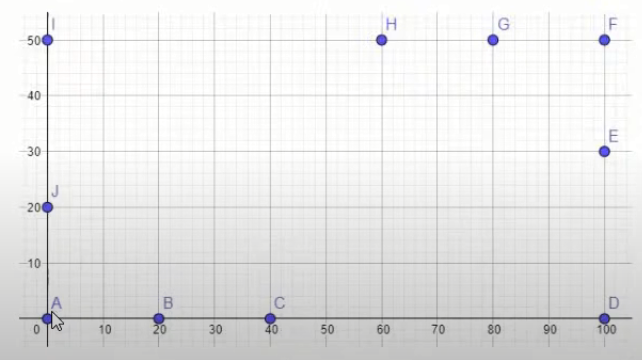

In [3]:
from IPython.display import Image
Image(filename='tsp.png') 

In [4]:
# import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
x = np.array([0, 20, 40, 100, 100, 100, 80, 60,  0,  0])
y = np.array([0,  0,  0,   0,  30,  50, 50, 50, 50, 20])

In [6]:
# number of cities / points
m = 10

# number of chromosomes in population
# -> maksudnya adalah   : Jumlah Kromosom yang akan di generate berapakali
# -> Sepesifik          : 2 3 4 9 0 1 5 6 7 8
#                       : Generate dari titik awal 2 jalan ke seluruh length
n = 10

# maximum generation
N = 100

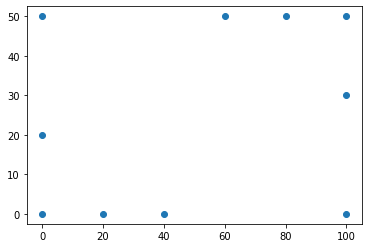

In [7]:
plt.scatter(x, y)
plt.show()

In [8]:
# distance matrix
# membuat matrix 10 * 10 dengan value 0
d = np.zeros((m,m), dtype=int)
d

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [9]:
# melakukan perulangan untuk row dan diganti menjadi bariavble i
for i in range(m):
    # melakukan perulangan untuk col dan diganti menjadi bariavble i
    for j in range(m):
        # memasukan value nilai, dengan rumus Euclidean distance
        d[i, j] = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)

d

array([[  0,  20,  40, 100, 104, 111,  94,  78,  50,  20],
       [ 20,   0,  20,  80,  85,  94,  78,  64,  53,  28],
       [ 40,  20,   0,  60,  67,  78,  64,  53,  64,  44],
       [100,  80,  60,   0,  30,  50,  53,  64, 111, 101],
       [104,  85,  67,  30,   0,  20,  28,  44, 101, 100],
       [111,  94,  78,  50,  20,   0,  20,  40, 100, 104],
       [ 94,  78,  64,  53,  28,  20,   0,  20,  80,  85],
       [ 78,  64,  53,  64,  44,  40,  20,   0,  60,  67],
       [ 50,  53,  64, 111, 101, 100,  80,  60,   0,  30],
       [ 20,  28,  44, 101, 100, 104,  85,  67,  30,   0]])

In [10]:
# DATA SUDAH DIDAPTKAN

In [11]:
# Fungsi create population
def createPopulation():
    # membuat array numpy bervalue 0, dengan baris sebanyak n dan colom sebanyak n
    pop = np.zeros((10, 10), dtype=int)
    # melakukan perulangan sebanyak baris n dan dijadikan i
    for i in range(n):
        # memasukan setiap index i(value) dengan permutatuion randmom(library numpy)
        pop[i] = np.random.permutation(m)
    # membuat array numpy menjadi dataframe
    pop = pd.DataFrame(pop)
    # mengembalikan nilai pop 
    return pop
pop = createPopulation();
pop

,0,1,2,3,4,5,6,7,8,9
0,1,6,3,2,8,5,9,0,7,4
1,6,5,9,7,3,0,8,4,2,1
2,1,3,5,7,4,9,2,0,6,8
3,0,8,7,9,2,5,4,6,1,3
4,8,3,4,2,1,5,6,9,7,0
5,2,8,1,9,0,7,6,3,4,5
6,9,7,0,8,5,2,1,4,6,3
7,7,6,1,9,5,4,8,3,0,2
8,4,8,3,7,9,2,5,6,1,0
9,3,5,1,7,6,8,0,9,4,2


In [12]:
# variable pop, dibuat dengan mengambil nilai create population


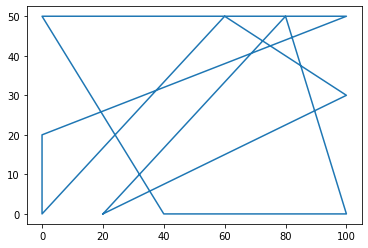

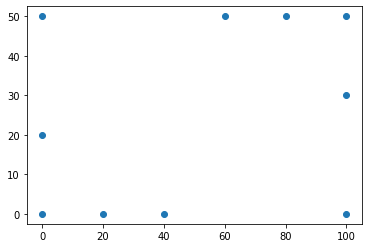

[1 6 3 2 8 5 9 0 7 4]
[ 20  80 100  40   0 100   0   0  60 100  20]
[ 0 50  0  0 50 50 20  0 50 30  0]


In [13]:
# Percobaan
# mengambil data frame index pertama
solusi = pop.loc[0]
# menjadikan data tersebut menjadi array(lb numpy)
solusi = solusi.to_numpy()

# menyediakan array kosong dengan jumlah dilebihkan 1, untuk menjadi titik perjalanan akhir
a = np.zeros(m+1, dtype=int)
b = np.zeros(m+1, dtype=int)



# melakukan perulangan pada iterasi, dengan range m = 10
for i in range(m):
    # mengisi tiap array kosong dengan solusi dengan iterasi perulangan titik x,y pada titik berikutnya
    a[i] = x[solusi[i]]
    b[i] = y[solusi[i]]

# karena length dari m = m + 1, index array ke 10 harus memiliki titik koordinate pertama(atau jalan pulang)
a[m] = a[0]
b[m] = b[0]


plt.plot(a, b)
plt.show()
plt.scatter(x, y)
plt.show()
print(solusi)
print(a)
print(b)
    




In [14]:
# # percobaan tanpa looping mebghitung jarak
# fitness = np.zeros(n, dtype=int)
# # loc berfungsi untuk mengambil baris BUKAN KOLOM
# # -mengambil baris 0(baris pertama dari variable penampung(pop))
# z = pop.loc[0]

# # print(z)

# # b adalah penampung nilai kosong
# b = 0
# # i adalah iterasi 
# # penjelasan : kita bisa mengambil index array yang kita ingin uji dengan value dari i
# i = 6

# # mengambil jarak keseluruhan dari sketsa dengan index ke i
# o = d[z[i]]
# # mengambil jarak keseluruhan dari sketsa dengan index ke i + 1 
# p = d[z[i+1]]
# # menyatukan, 2 titik bersampingan dan mendapatkan value awal dari nilai fitnes
# b += d[z[i], z[i+1]]

# print(d)
# print(z)
# print(o)
# print(p)
# print(b)


In [15]:
# Penjelasan
# Nilai fitnes adalah, value(nilai) dari titik a, ke b. dari titik b ke titik c result nya adalah seluruh 
# jarak ditambahkan


# isi dari variable d

def fitness(pop):
    # membuat variable fitnet dengan p
    # anjang length sebanyak
    fitness = np.zeros(n, dtype=int)

    # melakukan perulangan pada variable k didalam range n
    for k in range(n):
        # pop berisikan data Populasi awal(function Create Population) yang di ulang sebanyak n loc fungsi nya mebambil baris
        a = pop.loc[k]

        # membuat variable penampung data yaitu b
        b = 0



        # melakukan perulangan pada variable i didalam range m - 1 = pada kasus ini m = 10 - 1 = 9x perulangan
        for i in range(0, m-1): 
        # melakukan operasi assigment untuk variable b 
            b += d[a[i], a[i+1]]
            # print(b)
        # membuat titik menjadi balik pada a[0](titik awal value)    
        b += d[a[m-1], a[0]]
        
        
        fitness[k] = b
        
    pop['fitness'] = fitness
    return pop
    
fitness(pop)



,0,1,2,3,4,5,6,7,8,9,fitness
0,1,6,3,2,8,5,9,0,7,4,686
1,6,5,9,7,3,0,8,4,2,1,671
2,1,3,5,7,4,9,2,0,6,8,625
3,0,8,7,9,2,5,4,6,1,3,605
4,8,3,4,2,1,5,6,9,7,0,622
5,2,8,1,9,0,7,6,3,4,5,444
6,9,7,0,8,5,2,1,4,6,3,660
7,7,6,1,9,5,4,8,3,0,2,655
8,4,8,3,7,9,2,5,6,1,0,687
9,3,5,1,7,6,8,0,9,4,2,605


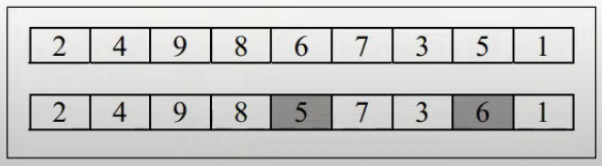

In [16]:
# contoh mutasi
from IPython.display import Image
Image(filename='exmut.png') 

In [17]:
def mutation(pop):
    popm = pop.copy()
    # # percobaan tanpa looping
    # position = np.random.permutation(m)
    # # mengacak posisi secara random pada variable a dan b
    # a = position[0]
    # b = position[1]
    # print(a)
    # print(b)
    # print(popm)
    # # penukaran Value
    # popm.loc[0][a] = popm.loc[0][b]
    # popm.loc[0][b] = popm.loc[0][a]
    # return popm





    for i in range(n):
        position = np.random.permutation(m)
        a = position[0]
        b = position[1]
        temp = popm.loc[i][a]
        popm.loc[i][a] = popm.loc[i][b]
        popm.loc[i][b] = temp

    return popm

popm = mutation(pop)
popm

,0,1,2,3,4,5,6,7,8,9,fitness
0,1,6,3,2,9,5,8,0,7,4,686
1,6,4,9,7,3,0,8,5,2,1,671
2,1,3,5,7,4,9,2,8,6,0,625
3,9,8,7,0,2,5,4,6,1,3,605
4,8,3,4,2,0,5,6,9,7,1,622
5,2,8,1,9,0,7,3,6,4,5,444
6,9,7,0,8,5,2,4,1,6,3,660
7,7,6,1,9,5,2,8,3,0,4,655
8,7,8,3,4,9,2,5,6,1,0,687
9,3,5,1,2,6,8,0,9,4,7,605


In [18]:
# Fungsi Kombinasi Populasi baik mutasi, sampai dengan non mutaso
def combinePopulation(pop, popm):
    # mengambil variable pop
    popAll = pop.copy()
    # menambahkan populasi yang telah di mutasi
    popAll = popAll.append(popm)
    # memberi index baru berdasarkan range, dan di ambil menggunakan len pada variable popAll
    popAll.index = range(len(popAll))

    # mengembalikan nilai popm
    return popAll

combinePopulation(pop, popm)

,0,1,2,3,4,5,6,7,8,9,fitness
0,1,6,3,2,8,5,9,0,7,4,686
1,6,5,9,7,3,0,8,4,2,1,671
2,1,3,5,7,4,9,2,0,6,8,625
3,0,8,7,9,2,5,4,6,1,3,605
4,8,3,4,2,1,5,6,9,7,0,622
5,2,8,1,9,0,7,6,3,4,5,444
6,9,7,0,8,5,2,1,4,6,3,660
7,7,6,1,9,5,4,8,3,0,2,655
8,4,8,3,7,9,2,5,6,1,0,687
9,3,5,1,7,6,8,0,9,4,2,605


In [19]:
def sort(popAll):
    # urutkan berdasarkan nilai fitnes terkecil
    popAll = popAll.sort_values(by=['fitness'])
    # memberikan index yang beruruutan
    popAll.index = range(len(popAll))
    # mengembalikan nilai popAll 
    return popAll


sort(popAll)

NameError: name 'popAll' is not defined

In [ ]:
def elimination(popAll):
    # mengeliminasi data, sebanyak n
    pop = popAll.head(n)
    # mengembalikan nilai pop 
    return pop
elimination(popAll)

,0,1,2,3,4,5,6,7,8,9,fitness
0,3,4,5,6,7,8,9,0,1,2,300
1,3,4,5,6,7,8,9,0,1,2,300
2,3,4,5,6,7,8,9,0,1,2,300
3,3,4,5,6,7,8,9,0,1,2,300
4,3,4,5,6,7,8,9,0,1,2,300
5,3,4,5,6,7,8,9,0,1,2,300
6,3,5,4,6,7,8,9,0,1,2,328
7,3,5,4,6,7,8,9,0,1,2,328
8,3,5,4,6,7,8,9,0,1,2,328
9,3,4,5,6,7,8,0,9,1,2,328


In [ ]:
def plotSolution(pop):
    solution = pop.loc[0]
    print(solution)
    # solution = solution.to_numpy()

    # a = np.zeros(m+1, dtype=int)
    # b = np.zeros(m+1, dtype=int)

    # for i in range(m):
    #     a[i] = x[solution[i]]
    #     b[i] = y[solution[i]]

    # a[m] = a[0]
    # b[m] = b[0]

    # plt.plot(a, b, marker = 'o')
    # plt.show()

plotSolution(pop)

   0  1  2  3  4  5  6  7  8  9  fitness
0  0  8  9  7  2  5  6  1  4  3      591
1  8  9  4  2  6  1  5  3  0  7      721
2  1  0  7  8  5  9  2  3  6  4      632
3  2  5  4  6  7  8  1  3  0  9      503
4  6  5  2  9  4  0  8  1  3  7      613
5  2  3  8  4  9  6  0  5  1  7      873
6  7  3  8  9  2  1  0  4  6  5      481
7  1  7  2  6  3  9  4  5  8  0      625
8  7  8  9  6  4  3  1  5  0  2      611
9  1  5  0  2  3  7  6  4  8  9      576


   0  1  2  3  4  5  6  7  8  9  fitness
0  0  8  9  7  2  5  6  1  4  3      591
0            0
1            8
2            9
3            7
4            2
5            5
6            6
7            1
8            4
9            3
fitness    591
Name: 0, dtype: int32


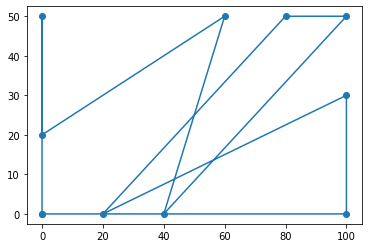

In [ ]:
# pop = createPopulation()
# pop = fitness(pop)
# print('Solusi pada populasi awal')
# print(pop.head(1))
# plotSolution(pop)

# for i in range(1, N+1):

#     popm = mutation(pop)
    
#     popm = fitness(popm)

#     popAll = combinePopulation(pop, popm)

#     popAll = sort(popAll)

#     pop = elimination(popAll)
    
#     print()
#     print('Solusi terbaik pada populasi generasi ke-'+ str(i))
#     print(pop.head(1))
#     plotSolution(pop)

# print()
# print('Solusi terbaik pada populasi akhir')
# print(pop.head(1))
# plotSolution(pop)